In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pylab import *

In [2]:
def compute_ndvi(RED,NIR):
    NDVI=(NIR-RED)/(NIR+RED)
    return NDVI

def modified_ndvi(RED,NIR):
    RED=RED+0.02
    NDVI_MOD=(NIR-RED)/(NIR+RED)
    return NDVI_MOD


In [3]:
nb=10000
RED=np.random.random_sample(nb)*0.1+0.01
NIR=np.random.random_sample(nb)*0.5+0.15
NoiseR=np.random.normal(0,0.02,nb)
NoiseN=np.random.normal(0,0.02,nb)

#replace negative values by zeroes
RED_noise=RED+NoiseR
RED_noise=np.where(RED_noise<0,0,RED_noise)

NIR_noise=NIR+NoiseN




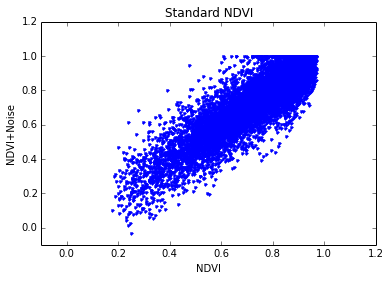

In [7]:
ndvi_ref=compute_ndvi(RED,NIR)
ndvi_noise=compute_ndvi(RED_noise,NIR_noise)


plot(ndvi_ref,ndvi_noise,'.')
ylim(-0.1,1.2)
xlim(-0.1,1.2)
title('Standard NDVI')
xlabel('NDVI')
ylabel('NDVI+Noise')
show()


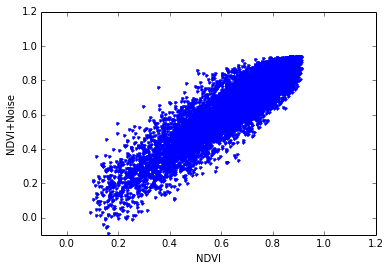

In [5]:
ndvi_ref=modified_ndvi(RED,NIR)
ndvi_noise=modified_ndvi(RED_noise,NIR_noise)


plot(ndvi_ref,ndvi_noise,'.')
ylim(-0.1,1.2)
xlim(-0.1,1.2)
title('Modified NDVI')
xlabel('NDVI')
ylabel('NDVI+Noise')
show()